## scikit-learn

Instead of re-inventing the wheel and writing our algorithms we can use scikit-learn to do all of the heavy lifting. 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

### Simple Linear Regression

In [2]:
path = os.getcwd() + '/dataset/ex1data1.txt' 
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head() #prints out the top 5

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


#### Formatting our data into matrices

In [3]:
#add dimension 1 for θ0
#DataFrame.insert(loc, column, value, allow_duplicates=False)
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1] #data.shape return (no of row, no of column)
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# convert from data frames to numpy matrices
X = np.matrix(X.values) #returns [[1, population]]
y = np.matrix(y.values) #returns [[profit]]

#print first 5 of our matrices
print("X = ",X[:5]) 
print("y = ",y[:5]) 

X =  [[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]]
y =  [[ 17.592 ]
 [  9.1302]
 [ 13.662 ]
 [ 11.854 ]
 [  6.8233]]


#### scikit-learn linear regression

In [4]:
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### plotting our results

In [5]:
x = np.array(X[:, 1].A1) # A1 returns a flatten numpy array
f = model.predict(X).flatten()

print("x = ",x[:5])
print("f = ",f[:5])

x =  [ 6.1101  5.5277  8.5186  7.0032  5.8598]
f =  [ 3.39377399  2.6989512   6.26719552  4.45927234  3.09515767]


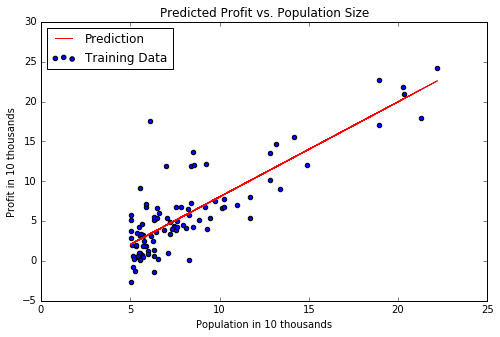

In [6]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Population in 10 thousands')
ax.set_ylabel('Profit in 10 thousands')
ax.set_title('Predicted Profit vs. Population Size')

In [7]:
model1Prediction = np.array([[1,15]])
model.predict(model1Prediction)

array([[ 13.99972378]])

We can see that with a population fo 15 thousand we can expect 14 thousand in profit

### Multivariate Linear Regression

In [8]:
path2 = os.getcwd() + '/dataset/ex1data2.txt' 
data2 = pd.read_csv(path2, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head() #prints out the top 5

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


#### Feature Normalization

In [9]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


#### Formatting Matrices

In [10]:
# add ones columns
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1] #return 4
X2 = data2.iloc[:,0:cols-1] # returns table with 
y2 = data2.iloc[:, cols-1:cols]

#print X and y
print(X2.head())
print(y2.head())

   Ones      Size  Bedrooms
0     1  0.130010 -0.223675
1     1 -0.504190 -0.223675
2     1  0.502476 -0.223675
3     1 -0.735723 -1.537767
4     1  1.257476  1.090417
      Price
0  0.475747
1 -0.084074
2  0.228626
3 -0.867025
4  1.595389


In [11]:
X2 = np.matrix(X2.values)
print("X2 = ",X2[:5]) 

X2 =  [[ 1.          0.13000987 -0.22367519]
 [ 1.         -0.50418984 -0.22367519]
 [ 1.          0.50247636 -0.22367519]
 [ 1.         -0.73572306 -1.53776691]
 [ 1.          1.25747602  1.09041654]]


In [12]:
y2 = np.matrix(y2.values)
print("y2 = ",y2[:5]) 

y2 =  [[ 0.47574687]
 [-0.08407444]
 [ 0.22862575]
 [-0.86702453]
 [ 1.59538948]]


We are going to break up the model into two simple linear regression to graph it. We will do Price vs Bedrooms and Price vs Size

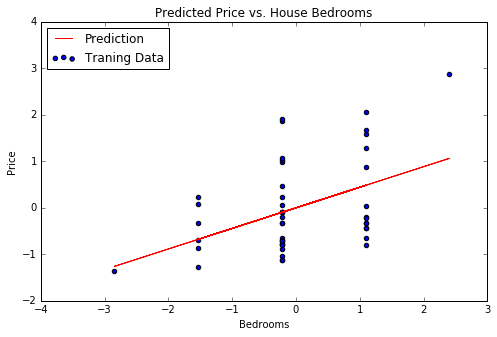

In [13]:
model2Bedroom = linear_model.LinearRegression()
model2Bedroom.fit(X2[:,2],y2)

x2Bedroom = np.array(X2[:,2].A1)  
f2Bedroom = model2Bedroom.predict(X2[:,2]).flatten()

fig, ax = plt.subplots(figsize=(8,5))  
ax.plot(x2Bedroom, f2Bedroom, 'r', label='Prediction')  
ax.scatter(data2.Bedrooms, data2.Price, label='Traning Data')  
ax.legend(loc=2)
ax.set_xlabel('Bedrooms')  
ax.set_ylabel('Price')  
ax.set_title('Predicted Price vs. House Bedrooms')  

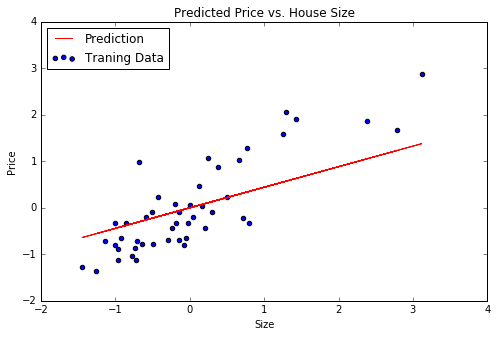

In [14]:
model2Size = linear_model.LinearRegression()
model2Size.fit(X2[:,1],y2)

x2Size = np.array(X2[:,1].A1)  
f2Size = model2Bedroom.predict(X2[:,1]).flatten()

fig, ax = plt.subplots(figsize=(8,5))  
ax.plot(x2Size, f2Size, 'r', label='Prediction')  
ax.scatter(data2.Size, data2.Price, label='Traning Data')  
ax.legend(loc=2)
ax.set_xlabel('Size')  
ax.set_ylabel('Price')  
ax.set_title('Predicted Price vs. House Size')  

In [15]:
model2 = linear_model.LinearRegression()
model2.fit(X2,y2)
model1prediction = np.array([[1,3000,3]])
model2.predict(model1prediction)

array([[ 2654.13842711]])

Sources:

http://www.johnwittenauer.net/machine-learning-exercises-in-python-part-2/ <== for the code

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <== for linear_model.LinearRegression()